 # Interceptación de proyectil por otro proyectil. Sympy


# Inicializando Sympy
Este paquete carga sympy y lo prepara para trabajar
Es necesario para utilizar la "t" como parámetro

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.8 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



El comando init_session llevaría a cabo algunas acciones por nostros:

    Gracias a use_latex=True obtenemos la salida en 𝐿𝐴𝑇𝐸𝑋.
    Crea una serie de variables para que podamos ponernos a trabajar en el momento.

Para más información, accceder a la documentación de Sympy:

https://docs.sympy.org/latest/index.html

Creamos los simbolos habituales (reales y complejos) así como las Funciones

In [2]:
a, b, c = symbols('a b c')   # La opción symbols('a',real=TRUE) restringiría el rango de la variable

In [3]:
C = symbols('C', complex='True')

In [4]:
w = symbols('Omega')
W = symbols('omega')
w, W

# Enunciado

Un vehículo que circula a 140 km·h⁻¹ llega al borde de un precipicio de 60 m de alto.

Un segundo más tarde, un sistema inteligente de rastreo localiza el vehículo y lanza un proyectil a su encuentro con la intención de que impacte por encima de los 30 m.

Determina la velocidad y ángulo de lanzamiento.

In [5]:
# Datos iniciales
x_coche_0 = 0         # m
y_coche_0 = 60        # m
v_coche_x = 140 /3.6  # m·s-1
v_coche_y_0 = 0       # m·s-1
g = 9.81              # m·s-2

# Condiciones de contorno finales
y_coche_final = 30    # m

In [6]:
# Comenzamos importando las funciones que vamos a utilizar:
#   * gráfico interno a documento
#   * importamos funciones de dibujo
#   * importamos libreria de operaciones numéricas con arrays

%matplotlib inline
from ipywidgets import interactive, fixed
from matplotlib import pyplot as plt
import numpy as np

In [7]:
# Definimos la función Sol_correcta(solución_lista) que escoge la solución
# correcta. 

def Sol_correcta(s):
    # Es solución única
    if len(s)>1:                   # Si es doble solución...
        if s[0]*s[1]<0:            #  Si tienen diferente signo
            t_sol=max(s[0],s[1])   #    la solución es la mayor de ellas
        else:                      #  Si tiene el mismo signo (mal ambos neg)
            t_sol=min(s[0],s[1])   #    la solución es la menor de ellas
    else:                          # es solución única
        t_sol = s[0]               #    para evitar que sea una lista
    return(t_sol)

In [8]:
# Ecuaciones de movimiento

# Coche

y_coche = y_coche_0 + v_coche_y_0 * t - 1/2 * g * t**2;

print('La altura del coche viene regida por la ecuación\nh = ',y_coche)

La altura del coche viene regida por la ecuación
h =  60 - 4.905*t**2


In [9]:
#Ecuaciones de movimiento

# proyectil

# comenzamos con la misma velocidad horizontal
# después la definiremos en función del ángulo, pero con catetos
# ya que la hipotenusa es la velocidad. Recordar que los catetos
# se relacionan por la hipotenusa (no utilizamos el ángulo)

x_proyectil_0 = 0     # m
y_proyectil_0 = 0     # m
v_proyectil_x = v_coche_x ; 
v_proyectil_y = 20    # m·s-1

y_proyectil = y_proyectil_0 + v_proyectil_y * t - 1/2 * g * t**2
print('La altura del proyectil viene regida por la ecuación\nh = ',y_proyectil)

La altura del proyectil viene regida por la ecuación
h =  -4.905*t**2 + 20*t


Determinemos el lugar de intersección

In [12]:
Interseccion= Eq(y_coche,y_proyectil);
print('Igualando las ecuaciones de altura: \n');
Interseccion

Igualando las ecuaciones de altura: 



In [13]:
solucion=solve(Interseccion);
print('\nY las soluciones a su punto de encuentro son: ',solucion)


Y las soluciones a su punto de encuentro son:  [3.00000000000000]


Analicemos la solución:
   * si es única será la correcta
   * si es doble, nos quedaremos con la positiva
   * Si es doble y ambas positivas, nos quedamos con al menor

In [14]:
t_sol = Sol_correcta(solucion)
print("La solución correcta es:",t_sol)

La solución correcta es: 3.00000000000000


In [16]:
# Llega al suelo el coche sin impacto
t_suelo = solve(Eq(y_coche,0))
t_suelo

También es posible determinar el tiempo que habría tardado el coche en llegar al suelo.

In [17]:
t_suelo_OK = Sol_correcta(t_suelo)
print("La solución es:",t_suelo_OK)

La solución es: 3.49748708391334


Representamos las funciones de caida de ambos cuerpos para verificar que ambos colisionan en el lugar indicado y en el piempo indicado.

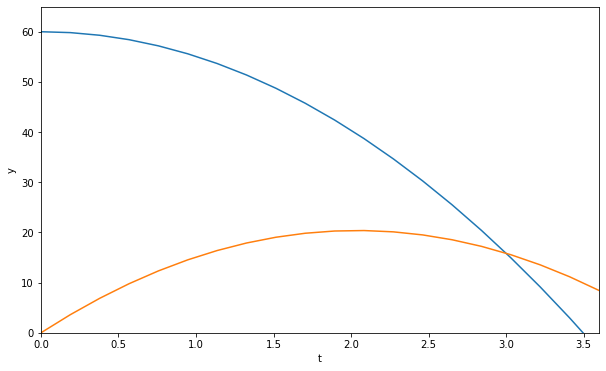

In [18]:
# Dibujando las ecuaciones
t_lin=np.linspace(0,int(t_sol*1.2*1e3)/1e3,num=20)

# Creamos el array y lo rellenamos de ceros
y_caida_graf  = np.zeros(len(t_lin))
y_subida_graf = np.zeros(len(t_lin))

# Ahora rellenamos el array con los valores que le corresponden
for  i in range(len(t_lin)):
    y_caida_graf[i]  = y_coche.subs(t,t_lin[i])
    y_subida_graf[i] = y_proyectil.subs(t,t_lin[i])

# Ahora definimos el tamaño del gráfico a más grande
plt.figure(figsize=(10,6))
# y delimitamos la región a representar => np.int() is deprecate, utilizar int()
plt.xlim(0,int(t_sol*1.2*1e3)/1e3)
plt.ylim(0,65)

# Introducimos leyendas
plt.xlabel('t')
plt.ylabel('y')

# Representamos las funciones
plt.plot(t_lin,y_caida_graf)
plt.plot(t_lin,y_subida_graf)
